**ogs@jupyter-lab: C process: Cs Transport-sorption Process**

<table><tr>
<td> <img src="../ogs-workflows.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="../icross-logo-ok.png" alt="Drawing" style="width: 100px;"/> </td>
</tr></table>

**Bentonite sorption case**

The chemical definition in database is foused on the surface complexation reations of Montmorillonite and Micocline. The main reactions are from Montmorillonite, which refer to the reference of [CMGB17](https://reader.elsevier.com/reader/sd/pii/S0883292717303232?token=341BA0D0CB00A792176714860A933DC03DF61EF5144F7F94FE7860D114EB5C4B32D52562E38B9425461C311701AF392E&originRegion=eu-west-1&originCreation=20211125143146).

**Scenario #1: Small molality of Montmorillonite**

In [35]:
from ogs6py import ogs
fs = ['without_sorption', 'with_sorption']
filename = "./bentoniteprj_mesh_size_00145_small_molality/bentonite_"
for f in fs:
    print("===============")
    print(">>> run ogs <<<")
    print('>>> Bentonite_'+ f)
    model = ogs.OGS(PROJECT_FILE=filename+f+'.prj')
    model.run_model(path="/home/chencha/Documents/ogs_bhe_impl/Release/bin")

>>> run ogs <<<
>>> Bentonite_without_sorption
OGS finished with project file ./bentoniteprj_mesh_size_00145_small_molality/bentonite_without_sorption.prj.
Execution took 0.6562380790710449 s
>>> run ogs <<<
>>> Bentonite_with_sorption
OGS finished with project file ./bentoniteprj_mesh_size_00145_small_molality/bentonite_with_sorption.prj.
Execution took 22.574612379074097 s


>>> print results <<<


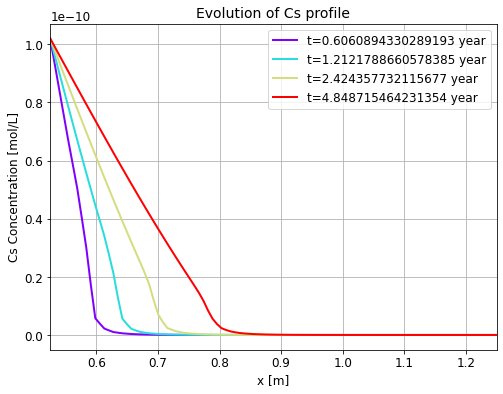

In [43]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.style.use('../notebook.mplstyle')
print("=====================")
print(">>> print results <<<")

pvdfile=vtuIO.PVDIO("./out_with_sorption.pvd", dim=1)

xaxis =  [(i,0,0) for i in np.linspace(start=0.525, stop=1.25, num=100)]
r_x = np.array(xaxis)[:,0]
time = [1911363.636*10,1911363.636*20,1911363.636*40,1911363.636*80]

color=iter(cm.rainbow(np.linspace(0,1,len(time))))
for t, color in zip(time, color):
    function_xaxis_t = pvdfile.read_point_set_data(t, 'Cs', pointsetarray=xaxis)
    plt.plot(r_x, function_xaxis_t/1000, label='t={} year'.format(t/86400/365), color=color)
    
plt.title("Evolution of Cs profile")
#plt.xscale('log')
plt.xlim(0.525,1.25)
plt.xlabel('x [m]')
plt.ylabel('Cs Concentration [mol/L]')

plt.legend()
plt.grid()

plt.show()

>>> print results <<<


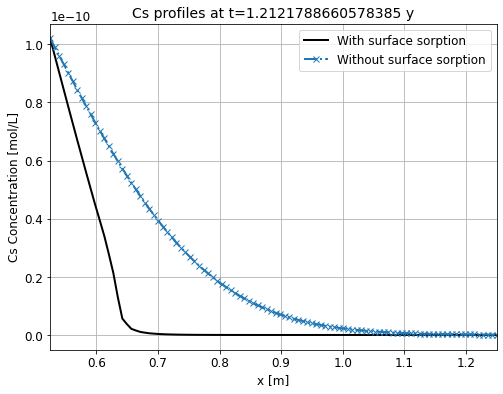

In [44]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.style.use('../notebook.mplstyle')
print("=====================")
print(">>> print results <<<")

pvd_with_sorption=vtuIO.PVDIO("./out_with_sorption.pvd", dim=1)
pvd_without_sorption=vtuIO.PVDIO("./out_without_sorption.pvd", dim=1)

xaxis =  [(i,0,0) for i in np.linspace(start=0.525, stop=1.25, num=100)]
r_x = np.array(xaxis)[:,0]

time = 1911363.636*20

func_1A = pvd_with_sorption.read_point_set_data(time, 'Cs', pointsetarray=xaxis)
func_1B = pvd_without_sorption.read_point_set_data(time, 'Cs', pointsetarray=xaxis)

plt.plot(r_x, func_1A/1000, label='With surface sorption', color='k')
plt.plot(r_x, func_1B/1000, label='Without surface sorption', linestyle='-.', marker="x")

title_str="Cs profiles at t={} y".format(time/86400/365)
plt.title(title_str)

#plt.xscale('log')
plt.xlim(0.525,1.25)
plt.xlabel('x [m]')
plt.ylabel('Cs Concentration [mol/L]')

plt.legend()
plt.grid()

#plt.savefig("Cs_profile_comparison.png")
plt.show()

**OGS links**
- notebook draft by OK: https://github.com/OlafKolditz/ogs-jupyter-lab

**Credits**
- Chaofan Chen and Jaime Garibay-Rodriguez for this benchmark set up.
- Jörg Buchwald for ogs6py and VTUInterface (https://joss.theoj.org/papers/6ddcac13634c6373e6e808952fdf4abc)
- Frameworks acknowledgements: OGS, Python, Jupyter, matplotlib